Questao3 Utilizar o dataset Titanic

In [153]:
import os
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
TITANIC_PATH = os.path.join("datasets","titanic")
TITANIC_URL = DOWNLOAD_ROOT + "datasets/titanic/"

In [154]:
import urllib
def fetch_data(url= TITANIC_URL,path= TITANIC_PATH):
    if not os.path.exists(path):
        os.makedirs(path)
    for file_name in ("train.csv","test.csv"):
        file_path = os.path.join(path, file_name)
        if not os.path.isfile(file_path):
            print("Downloading", file_name)
            urllib.request.urlretrieve(url + file_name, file_path)

In [155]:
fetch_data()

In [156]:
import pandas as pd
train_dataset = pd.read_csv("datasets/titanic/train.csv")
test_dataset = pd.read_csv("datasets/titanic/test.csv")

In [157]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory analisys

In [158]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
titanic_df = train_dataset.copy()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

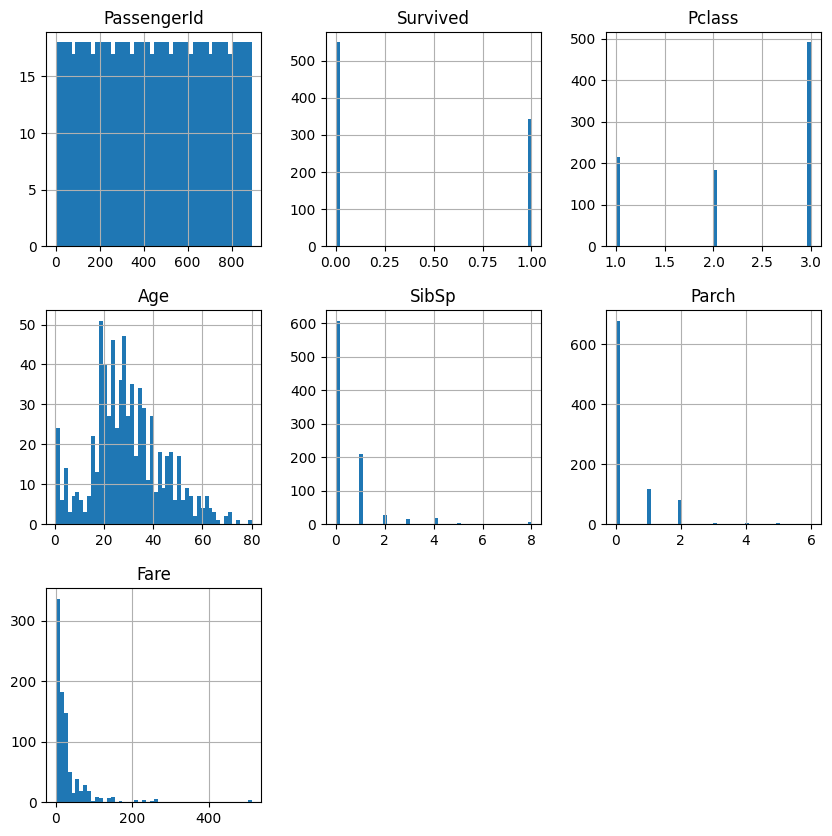

In [161]:
import matplotlib.pyplot as plt
titanic_df.hist(bins = 50, figsize=(10,10))

<AxesSubplot:>

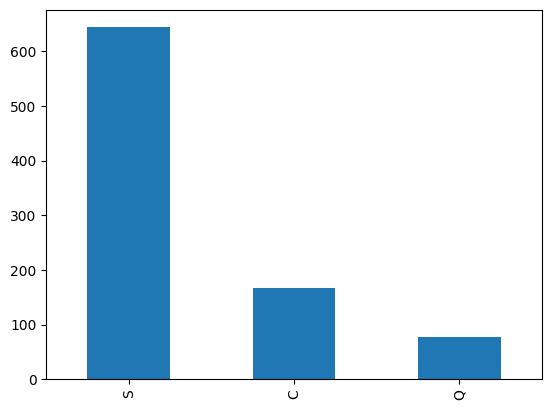

In [162]:
titanic_df.Embarked.value_counts().plot(kind='bar')

<AxesSubplot:>

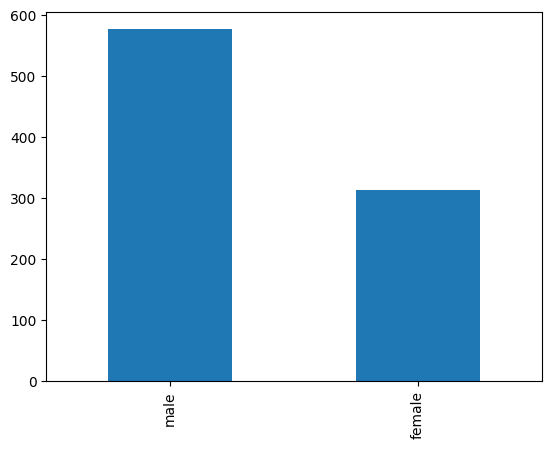

In [163]:
titanic_df.Sex.value_counts().plot(kind='bar')

In [164]:
def split_age(age):
    if age < 10:
        return "0-10"
    if 10 < age <= 20:
        return "11-20"
    if 20 < age <= 30:
        return "21-30"
    if 30 < age <= 40:
        return "31-40"
    if 40 < age <= 50:
        return "41-50"
    if 50 < age <= 60:
        return "51-60"
    if 60 < age:
        return "60+"

In [165]:
titanic_df['cat_age'] = titanic_df['Age'].apply(split_age)

In [166]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cat_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11-20
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21-30


In [167]:
corr = titanic_df.corr()

corr['Survived'].sort_values(ascending=True)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [168]:
titanic_df = titanic_df.drop('PassengerId',axis=1)

Data preparation

In [169]:
X_train = titanic_df.drop(['Survived'],axis=1)
y_train = titanic_df['Survived']

In [170]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder', OneHotEncoder(sparse=False))])
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [171]:
import numpy as np
num_atribbs = ["Age","SibSp", "Parch", "Fare"]
cat_attribs = ["Sex","Pclass","Embarked",'cat_age']

In [172]:
full_pipeline = ColumnTransformer([("num",num_pipeline,num_atribbs),("cat",cat_pipeline,cat_attribs)],)
data_prepared = full_pipeline.fit_transform(X_train)

In [173]:
data_prepared

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ]])

# Train

### Knn

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors":[3,4,5],"weights":["uniform","distance"]}

grid_knn = GridSearchCV(knn_clf,param_grid, scoring = "accuracy",cv=5)

In [185]:
grid_knn.fit(data_prepared,y_train)

/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [186]:
grid_knn.best_score_

0.8024982738057874

In [187]:
grid_knn.best_estimator_

KNeighborsClassifier()

In [188]:
from sklearn.model_selection import cross_val_score

knn_clf = grid_knn.best_estimator_

y_preds = cross_val_score(knn_clf,data_prepared,y_train,cv=10)

y_preds.mean()


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

0.8059176029962547

In [189]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(data_prepared,y_train)

SVC()

In [193]:
param_grid = [{'kernel':['linear'],'C':[10.,20.,30.,40.,1000.]},
              {'kernel':['linear'],'gamma':[0.5,1.0,3.0]},
              {'kernel':['rbf'],'C':[10.,20.,30.,40.,1000.],'gamma':[0.5,1.0,3.0]}]

grid_svc = GridSearchCV(SVC(),param_grid,cv=10,scoring="accuracy")
grid_svc.fit(data_prepared,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10.0, 20.0, 30.0, 40.0, 1000.0],
                          'kernel': ['linear']},
                         {'gamma': [0.5, 1.0, 3.0], 'kernel': ['linear']},
                         {'C': [10.0, 20.0, 30.0, 40.0, 1000.0],
                          'gamma': [0.5, 1.0, 3.0], 'kernel': ['rbf']}],
             scoring='accuracy')

In [194]:
best_svc = grid_svc.best_estimator_
scores = cross_val_score(best_svc,data_prepared,y_train,cv=10)
scores.mean()

0.8205243445692882